# 1. Carregando dados da web - Roubos de celular em São Paulo

Dataset: https://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
!conda list openpyxl

# packages in environment at C:\Users\maste\anaconda3:
#
# Name                    Version                   Build  Channel
openpyxl                  3.1.2           py312h2bbff1b_0  


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
!conda list pandas

# packages in environment at C:\Users\maste\anaconda3:
#
# Name                    Version                   Build  Channel
geopandas                 0.14.2          py312haa95532_0  
geopandas-base            0.14.2          py312haa95532_0  
pandas                    2.2.2           py312h0158946_0  


In [12]:
#importar bibliotecas
import pandas as pd


In [37]:
filename = r"C:\Users\maste\Downloads\SPSafe-roubo_celular\dados\dados_roubo_celular_sp_2020.xlsx"

df_roubos = pd.read_excel(filename)

In [39]:
df_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2020,1646238,1646238/2020,01/11/2020 00:03:07,01/11/2020 00:01:32,31/10/2020,16:30,A TARDE,31/10/2020,01/11/2020 00:03:07,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,ASUS
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,EQT9081,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE


In [41]:
#listar todas as colunas para ver se tem informações de latitude e longitude
df_roubos.columns

Index(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE',
       'NUMERO_BOLETIM_PRINCIPAL', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE',
       'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
       'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
       'DESDOBRAMENTO', 'STATUS', 'NOMEPESSOA', 'TIPOPESSOA', 'VITIMAFATAL',
       'RG', 'RG_UF', 'NATURALIDADE', 'NACIONALIDADE', 'SEXO',
       'DATANASCIMENTO', 'IDADE', 'ESTADOCIVIL', 'PROFISSAO', 'GRAUINSTRUCAO',
       'CORCUTIS', 'NATUREZAVINCULADA', 'TIPOVINCULO', 'RELACIONAMENTO',
       'PARENTESCO', 'PLACA_VEICULO', 'UF_VEICULO', 'CIDADE_VEICULO',
       'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO',
       'ANO_MODELO', 'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],
      dtype='object')

In [43]:
df_roubos[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,NaN,NaN
1,-23.686360,-46.765585
2,-23.612298,-46.609388
3,-23.640576,-46.760755
4,-23.593117,-46.606192
...,...,...
16367,NaN,NaN
16368,NaN,NaN
16369,NaN,NaN
16370,NaN,NaN


In [49]:
#reomovendo os dados de Latitude e Longitude nulos
df_roubos = df_roubos.dropna(subset=['LATITUDE', 'LONGITUDE'])

df_roubos[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
1,-23.686360,-46.765585
2,-23.612298,-46.609388
3,-23.640576,-46.760755
4,-23.593117,-46.606192
5,-23.593117,-46.606192
...,...,...
16363,-23.627340,-46.716842
16364,-23.635372,-46.492679
16365,-23.538349,-46.486512
16366,-23.632600,-46.736134


# 2 - Criando o GeoDataFrame (GeoPandas)

In [52]:
#importando a classe point da bbt Shapely
from shapely.geometry import Point

In [54]:
#criar coluna geometry
df_roubos['geometry'] = None

for index, row in df_roubos.iterrows():
    df_roubos.loc[index, 'geometry'] = Point(row.LONGITUDE, row.LATITUDE)

In [56]:
df_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.7655849940429 -23.6863604960612)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.6093881566447 -23.6122975624363)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.7607553457118 -23.6405763334634)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.6061920346 -23.5931170972)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.6061920346 -23.5931170972)


# 2. Criando o GeoDataFrame

In [58]:
type(df_roubos)

pandas.core.frame.DataFrame

In [61]:
import geopandas as gpd

In [63]:
#criando o GeoDataFrame

gdf_roubos = gpd.GeoDataFrame(df_roubos, geometry='geometry')

In [65]:
type(gdf_roubos)

geopandas.geodataframe.GeoDataFrame

In [67]:
gdf_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.76558 -23.68636)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.60939 -23.61230)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.76076 -23.64058)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.60619 -23.59312)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.60619 -23.59312)


<Axes: >

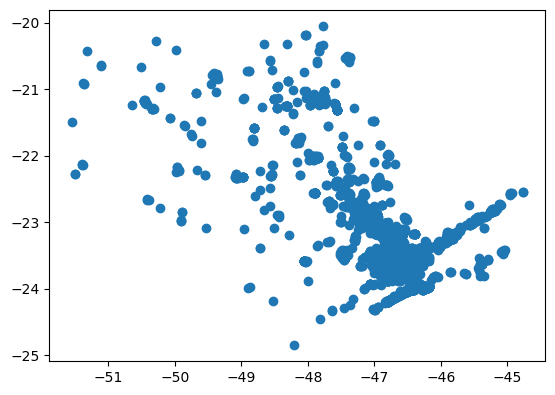

In [69]:
gdf_roubos.plot()

# 3. Operação de intersecção entre geometrias

In [75]:
#carregar os dados da capital

filename = r"C:\Users\maste\Downloads\SPSafe-roubo_celular\dados\capital_são_paulo.json"

gdf_capital_sp = gpd.read_file(filename, driver='GeoJSON')

C:\Users\maste\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


<Axes: >

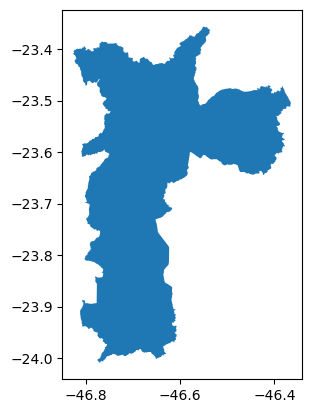

In [77]:
gdf_capital_sp.plot()

# Mostrando os dois conjuntos de dados no mesmo mapa

In [80]:
import matplotlib.pyplot as plt

<Axes: >

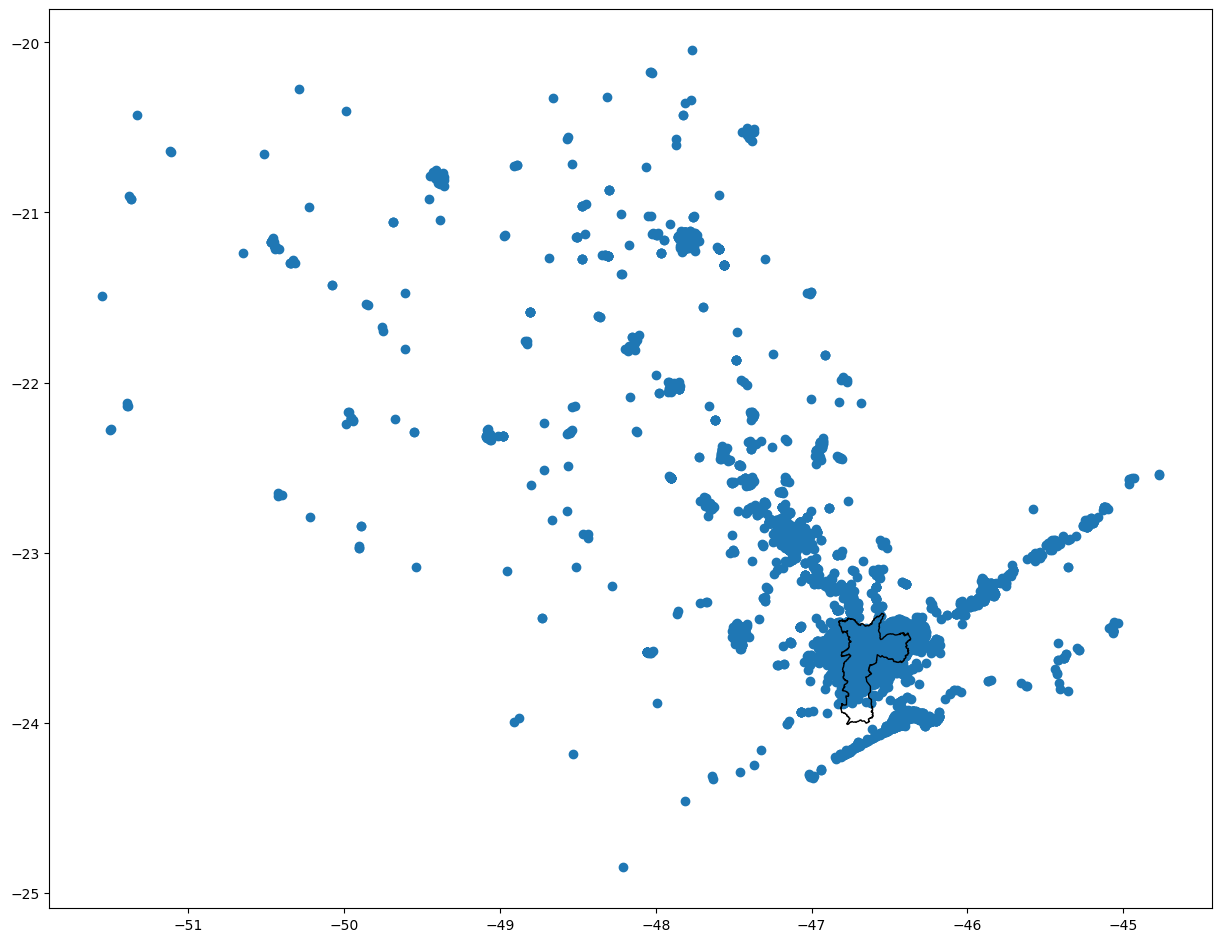

In [82]:
fig, ax = plt.subplots(figsize=(15,15))

gdf_roubos.plot(ax=ax)
gdf_capital_sp.plot(ax=ax, facecolor="None", edgecolor="black")

In [84]:
#polygon de São Paulo
polygon_sp = gdf_capital_sp.iloc[0].geometry

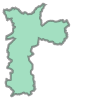

In [86]:
polygon_sp

In [90]:
# operação de intersecção entre as geometrias
gdf_roubos_capital = gdf_roubos[gdf_roubos.intersects(polygon_sp)]

<Axes: >

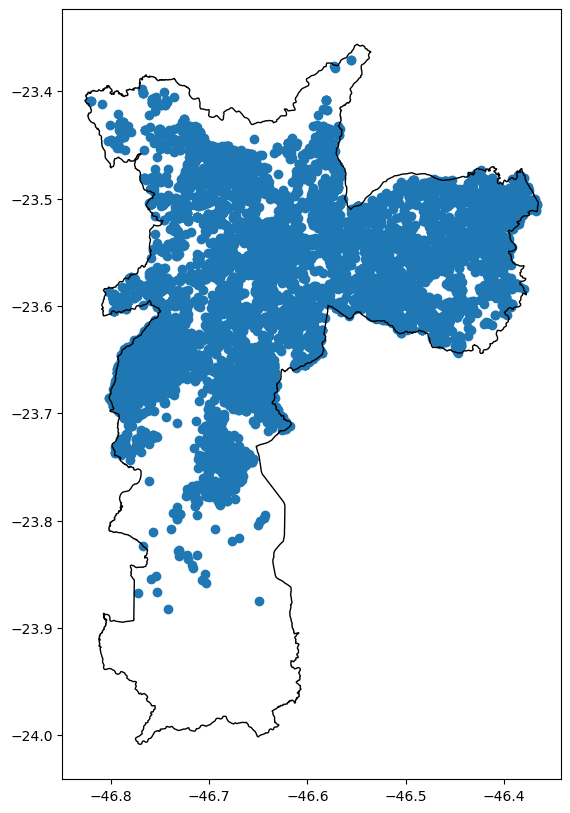

In [92]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_roubos_capital.plot(ax=ax)
gdf_capital_sp.plot(ax=ax, facecolor="None", edgecolor="black")

In [96]:
#salvando os dados
filename = r"C:\Users\maste\Downloads\SPSafe-roubo_celular\dados\roubo_celular_capital.json"

gdf_roubos_capital.to_file(filename, driver='GeoJSON')

C:\Users\maste\anaconda3\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
